# Import and Preprocess the Dataset

In [4]:
import pandas as pd
df=pd.read_csv('Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [8]:
# Check data types and null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [14]:
# Convert categorical variables using One-Hot Encoding
df_processed = pd.get_dummies(df, drop_first=True)

In [12]:
df_processed.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


# Split Data into Train-Test Sets

In [26]:
# Define features (X) and target (y)
from sklearn.model_selection import train_test_split
X=df_processed.drop('price',axis=1)
Y=df_processed['price']

# Split into training and testing sets (80% train, 20% test)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [36]:
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [58]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (436, 13)
Test set size: (109, 13)


In [56]:
print(f"Training set size: {y_train.shape}")
print(f"Test set size: {y_test.shape}")

Training set size: (436,)
Test set size: (109,)


# Fit a Linear Regression Model

In [63]:
from sklearn.linear_model import LinearRegression
# Creating a Linear Regression model
model = LinearRegression()

In [65]:
# Fitting (train) the model
model.fit(X_train, y_train)

LinearRegression()

In [69]:
print("Model trained successfully!")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients:\n{pd.Series(model.coef_, index=X.columns)}")

Model trained successfully!
Intercept: 260032.35760741401
Coefficients:
area                               2.359688e+02
bedrooms                           7.677870e+04
bathrooms                          1.094445e+06
stories                            4.074766e+05
parking                            2.248419e+05
mainroad_yes                       3.679199e+05
guestroom_yes                      2.316100e+05
basement_yes                       3.902512e+05
hotwaterheating_yes                6.846499e+05
airconditioning_yes                7.914267e+05
prefarea_yes                       6.298906e+05
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64


# Evaluate the Model

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_pred = model.predict(X_test)

In [84]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")

Mean Absolute Error (MAE): ₹970043.40


In [86]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): ₹{mse:.2f}")

Mean Squared Error (MSE): ₹1754318687330.66


In [88]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.6529


#  Plot Regression Line & Interpret Coefficients

<Axes: xlabel='area', ylabel='price'>

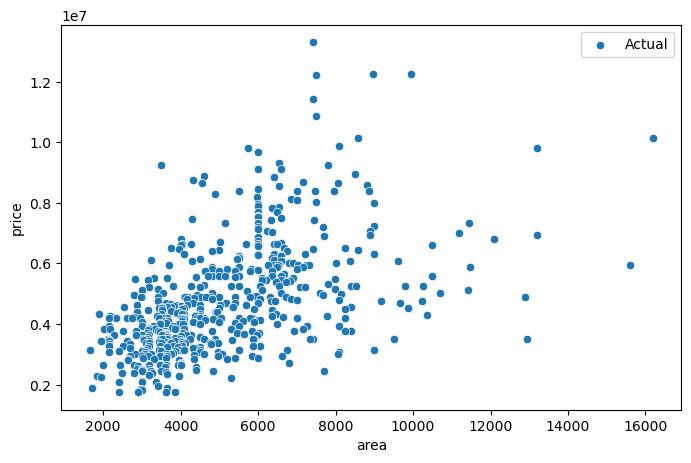

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Area vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['area'], y=df['price'], label='Actual')





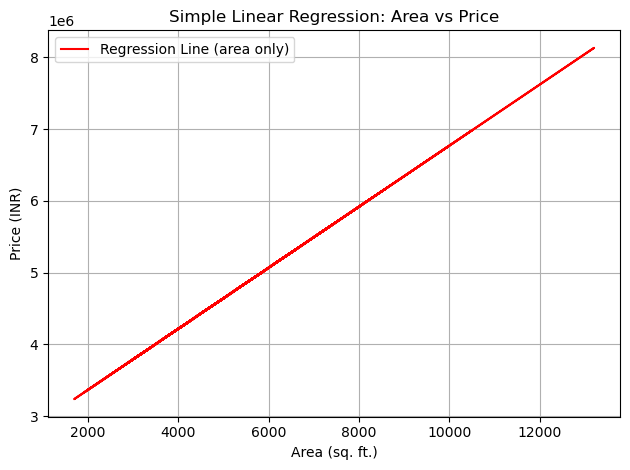

In [116]:
# Predict using only 'area' for plotting the line
simple_model = LinearRegression()
simple_model.fit(X_train[['area']], y_train)
area_range = X_test[['area']] 
area_preds = simple_model.predict(area_range)
# Plot regression line
plt.plot(area_range, area_preds, color='red', label='Regression Line (area only)')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Price (INR)')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

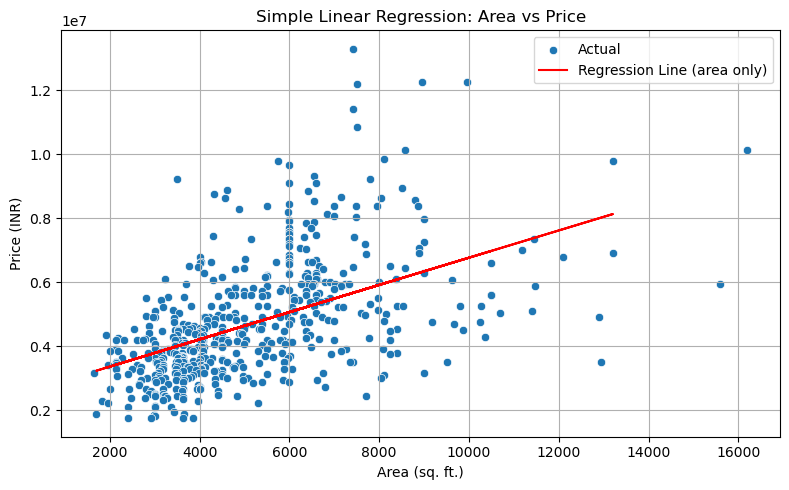

In [119]:
# Scatter plot: Area vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['area'], y=df['price'], label='Actual')
# Predict using only 'area' for plotting the line
simple_model = LinearRegression()
simple_model.fit(X_train[['area']], y_train)
area_range = X_test[['area']] 
area_preds = simple_model.predict(area_range)
# Plot regression line
plt.plot(area_range, area_preds, color='red', label='Regression Line (area only)')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Price (INR)')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()